# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("SL.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_response

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18690118,
   'total_supply': 18690118,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 49607.0,
     'volume_24h': 55314062525,
     'market_cap': 927064732618,
     'percentage_change_1h': -0.377884562654167,
     'percentage_change_24h': 1.0566122308714,
     'percentage_change_7d': -19.334687506415,
     'percent_change_1h': -0.377884562654167,
     'percent_change_24h': 1.0566122308714,
     'percent_change_7d': -19.334687506415}},
   'last_updated': 1619272398}},
 'metadata': {'timestamp': 1619272398,
  'num_cryptocurrencies': 1312,
  'error': None}}

In [6]:
btc_price = btc_response['data']['1']['quotes']['USD']['price']
btc_price

49607.0

In [7]:
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_response

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 115600831,
   'total_supply': 115600831,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2222.02,
     'volume_24h': 39396004044,
     'market_cap': 257106571563,
     'percentage_change_1h': -0.467825304465092,
     'percentage_change_24h': -0.305059132619558,
     'percentage_change_7d': -8.35342603818931,
     'percent_change_1h': -0.467825304465092,
     'percent_change_24h': -0.305059132619558,
     'percent_change_7d': -8.35342603818931}},
   'last_updated': 1619272372}},
 'metadata': {'timestamp': 1619272372,
  'num_cryptocurrencies': 1312,
  'error': None}}

In [8]:
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
eth_price

2222.02

In [9]:
# Compute current value of my crpto
my_btc_value = my_btc*btc_price
my_eth_value = my_eth*eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $59528.40
The current value of your 5.3 ETH is $11776.71


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("Alpaca_API_Key")
alpaca_secret_key = os.getenv("Alpaca_Secret_Key")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [17]:
# Format current date as ISO format
today = pd.Timestamp("2021-04-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
closing_price_df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
print(closing_price_df_portfolio)

                              AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2021-04-23 00:00:00-04:00  114.81  115.086  114.6415  114.75  3506457  412.87   

                                                             
                             high     low   close    volume  
time                                                         
2021-04-23 00:00:00-04:00  418.25  412.79  416.72  62184753  


In [19]:
# Pick AGG and SPY close prices
closing_prices = pd.DataFrame()
closing_prices["AGG"] = closing_price_df_portfolio["AGG"]["close"]
closing_prices["SPY"] = closing_price_df_portfolio["SPY"]["close"]

closing_prices.index = closing_prices.index.date
agg_close_price = closing_prices["AGG"][0]
spy_close_price = closing_prices["SPY"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.75
Current SPY closing price: $416.72


In [20]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20836.00
The current value of your 200 AGG shares is $22950.00


### Savings Health Analysis

In [23]:
# Set monthly household income
monthly_income = 12000
crypto_amount = my_btc_value + my_eth_value
my_shares = my_agg_value + my_spy_value

# Create savings DataFrame
health_savings = {"amount":[crypto_amount, my_shares]}
savings_label = ["crypto", "shares"]

df_savings = pd.DataFrame(health_savings, index=savings_label)


# Display savings DataFrame
display(df_savings)

,amount
crypto,71305.106
shares,43786.000


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

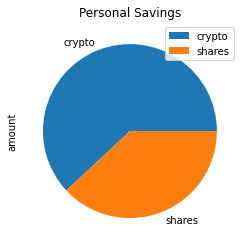

In [24]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Personal Savings")

In [26]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
Total_amount_savings = crypto_amount + my_shares

# Validate saving health
if Total_amount_savings > emergency_fund:
    print("Congratulations, you have enough money in your emergency fund!")
elif Total_amount_savings == emergency_fund:
    print("Congratulations, on reaching this financial goal!")
else:
    print(f"You need more more for reaching your goal.")

Congratulations, you have enough money in your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [35]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-04-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-23', tz='America/New_York').isoformat()

In [36]:
# Get 5 years' worth of historical data for SPY and AGG
mc_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
mc_stock_data.head()

AGG                                         SPY  \
                             open    high       low    close   volume    open   
time                                                                            
2020-11-30 00:00:00-05:00  118.32  118.45  118.2500  118.400  5231566  362.83   
2020-12-01 00:00:00-05:00  118.03  118.10  117.7300  117.840  4308362  365.57   
2020-12-02 00:00:00-05:00  117.81  117.81  117.5400  117.705  5554915  364.82   
2020-12-03 00:00:00-05:00  117.92  117.98  117.7650  117.910  5210910  366.68   
2020-12-04 00:00:00-05:00  117.90  117.90  117.5133  117.580  4821820  367.32   

                                                               
                             high     low     close    volume  
time                                                           
2020-11-30 00:00:00-05:00  363.12  359.17  362.0000  67154075  
2020-12-01 00:00:00-05:00  367.68  364.93  365.9700  64527332  
2020-12-02 00:00:00-05:00  366.96  364.20  366.7599  37323404  
2020-12-03 00:00:00-05:00  368.19  365.50  366.6698  52905586  
2020-12-04 00:00:00-05:00  369.85  367.22  369.8300  40264568

In [37]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_stock_30year = MCSimulation(
    portfolio_data = mc_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [38]:
# Printing the simulation input data
mc_stock_30year.portfolio_data

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2020-11-30 00:00:00-05:00  118.32  118.450  118.2500  118.400  5231566   
2020-12-01 00:00:00-05:00  118.03  118.100  117.7300  117.840  4308362   
2020-12-02 00:00:00-05:00  117.81  117.810  117.5400  117.705  5554915   
2020-12-03 00:00:00-05:00  117.92  117.980  117.7650  117.910  5210910   
2020-12-04 00:00:00-05:00  117.90  117.900  117.5133  117.580  4821820   
...                           ...      ...       ...      ...      ...   
2021-04-19 00:00:00-04:00  114.00  114.500  114.0000  114.440  4820664   
2021-04-20 00:00:00-04:00  114.42  114.670  114.3900  114.620  3674209   
2021-04-21 00:00:00-04:00  114.60  114.740  114.5300  114.740  5250384   
2021-04-22 00:00:00-04:00  114.74  114.800  114.5900  114.770  3518947   
2021-04-23 00:00:00-04:00  114.81  115.086  114.6415  114.750  3506457   

                                           SPY                              \
                          daily_return    open      high     low     close   
time                                                                         
2020-11-30 00:00:00-05:00          NaN  362.83  363.1200  359.17  362.0000   
2020-12-01 00:00:00-05:00    -0.004730  365.57  367.6800  364.93  365.9700   
2020-12-02 00:00:00-05:00    -0.001146  364.82  366.9600  364.20  366.7599   
2020-12-03 00:00:00-05:00     0.001742  366.68  368.1900  365.50  366.6698   
2020-12-04 00:00:00-05:00    -0.002799  367.32  369.8500  367.22  369.8300   
...                                ...     ...       ...     ...       ...   
2021-04-19 00:00:00-04:00    -0.000873  416.26  416.7400  413.79  415.2400   
2021-04-20 00:00:00-04:00     0.001573  413.91  415.0859  410.59  412.2200   
2021-04-21 00:00:00-04:00     0.001047  411.51  416.2900  411.36  416.0800   
2021-04-22 00:00:00-04:00     0.000261  415.88  416.7800  411.13  412.3000   
2021-04-23 00:00:00-04:00    -0.000174  412.87  418.2500  412.79  416.7200   

                                                  
                             volume daily_return  
time                                              
2020-11-30 00:00:00-05:00  67154075          NaN  
2020-12-01 00:00:00-05:00  64527332     0.010967  
2020-12-02 00:00:00-05:00  37323404     0.002158  
2020-12-03 00:00:00-05:00  52905586    -0.000246  
2020-12-04 00:00:00-05:00  40264568     0.008619  
...                             ...          ...  
2021-04-19 00:00:00-04:00  66226327    -0.004960  
2021-04-20 00:00:00-04:00  69715050    -0.007273  
2021-04-21 00:00:00-04:00  54772634     0.009364  
2021-04-22 00:00:00-04:00  90085820    -0.009085  
2021-04-23 00:00:00-04:00  62186191     0.010720  

[100 rows x 12 columns]

In [39]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_stock_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002215,0.995630,1.002048,1.001710,0.999902,1.000904,0.999090,1.000424,1.003676,0.995349,...,0.995569,1.003607,0.995720,1.000510,0.998538,1.005554,0.998992,1.004239,0.993079,0.998387
2,0.998086,0.995852,1.004909,0.996829,1.000648,0.997262,0.996562,1.005463,1.007140,0.994201,...,0.992914,1.002086,0.995219,0.999958,1.000556,1.012347,1.006616,1.003663,0.996313,0.998243
3,0.998208,0.998617,1.007341,0.993490,0.999171,0.998113,0.991858,1.010794,1.011317,0.996100,...,1.000965,0.996458,0.997180,0.993843,1.003051,1.011716,1.006755,1.004096,1.001116,0.996507
4,1.006633,0.997049,1.006667,0.992224,0.997528,1.000959,0.994245,1.008676,1.008027,0.995106,...,0.999588,0.999598,1.002271,0.992236,0.997470,1.009130,1.013310,1.006606,1.005411,0.988741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.533737,8.417968,11.826485,18.195959,61.442808,18.154796,19.294312,16.626145,18.581502,16.583452,...,21.410559,23.457440,12.422573,18.103007,15.746003,18.798127,26.262926,10.368448,16.198549,10.218940
7557,20.415294,8.391237,11.887552,18.148616,61.844049,18.280899,19.315023,16.610645,18.574675,16.678903,...,21.282530,23.436704,12.344037,18.165022,15.748940,18.801762,26.233728,10.383247,16.258457,10.182220
7558,20.365808,8.390290,11.824778,18.243413,61.646828,18.274411,19.275629,16.605596,18.441436,16.680060,...,21.179426,23.357903,12.303079,18.181878,15.846047,18.872220,26.071432,10.392979,16.228585,10.190953
7559,20.378387,8.364223,11.826225,18.242699,61.437238,18.336836,19.275769,16.603384,18.450559,16.661579,...,21.113716,23.525314,12.358111,18.221080,15.857556,18.858629,26.137284,10.416527,16.263720,10.161016


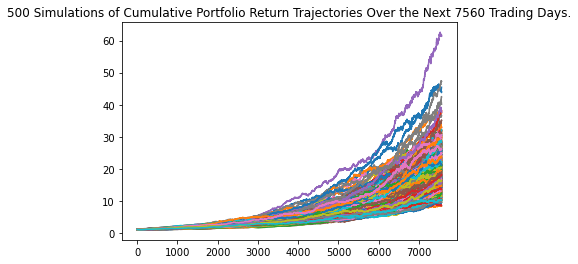

In [40]:
# Plot simulation outcomes
line_plot = mc_stock_30year.plot_simulation()

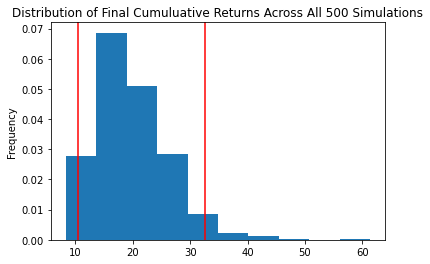

In [41]:
# Plot probability distribution and confidence intervals
dist_plot = mc_stock_30year.plot_distribution()

### Retirement Analysis

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = mc_stock_30year.summarize_cumulative_return()

# Print summary statistics.
print(summary)

count           500.000000
mean             19.724712
std               6.445472
min               8.308540
25%              15.292192
50%              18.700504
75%              23.180863
max              61.355110
95% CI Lower     10.353511
95% CI Upper     32.574663
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [44]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*20000,2)
ci_upper = round(summary[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $207070.23 and $651493.27


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [46]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*(20000*1.5),2)
ci_upper = round(summary[9]*(20000*1.5),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $310605.34 and $977239.9


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [47]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5year = MCSimulation(
    portfolio_data = mc_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [48]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000404,1.002127,0.997787,0.997126,0.999844,0.996870,0.998142,1.001272,1.004568,0.996892,...,0.998864,1.001120,0.999510,1.001499,1.003800,1.004128,0.996327,1.001418,1.004071,0.998703
2,1.003135,1.001746,0.993092,0.997645,0.994203,0.998490,0.993836,0.995308,1.009634,0.987790,...,1.001675,1.000432,1.002240,0.999729,1.002056,1.002465,0.992289,1.002225,1.003505,0.997400
3,1.002975,1.005678,0.988522,0.996183,0.995534,0.998100,0.997396,0.996893,1.005389,0.984691,...,1.000357,0.997568,1.007207,0.999963,0.997987,1.005162,0.992622,1.007257,1.003584,0.998024
4,1.005380,1.007438,0.986649,0.999807,0.991743,1.004720,0.999854,0.996961,1.004391,0.980496,...,1.000330,0.995521,1.005633,0.995173,0.998375,1.005261,0.997112,1.012590,1.007255,1.002727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.879570,1.924321,2.008136,1.381466,1.472888,1.829227,1.495326,1.479041,1.293244,1.624754,...,1.487231,1.686471,1.625563,1.498161,1.541896,1.592066,1.530358,1.534950,1.507143,1.641222
1257,1.871997,1.926342,2.014767,1.381314,1.479455,1.827062,1.489302,1.473921,1.301586,1.626787,...,1.484977,1.687587,1.631437,1.498630,1.531577,1.597420,1.528497,1.526720,1.509690,1.631104
1258,1.877999,1.932225,2.008251,1.380526,1.476973,1.814145,1.499266,1.469094,1.299167,1.628713,...,1.491460,1.694367,1.647116,1.502679,1.531683,1.589578,1.534594,1.517107,1.505762,1.620430
1259,1.881705,1.936600,1.998556,1.373640,1.479721,1.821931,1.497745,1.470888,1.296512,1.631697,...,1.488431,1.702866,1.652634,1.505021,1.521270,1.584636,1.534990,1.518234,1.502557,1.601909


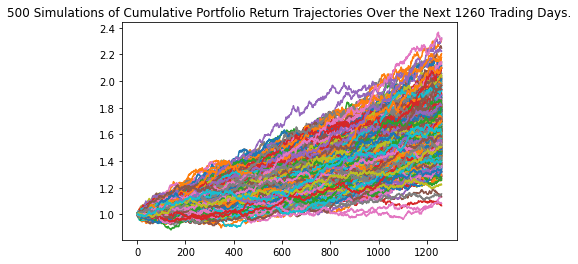

In [49]:
# Plot simulation outcomes
line_plot = mc_5year.plot_simulation()

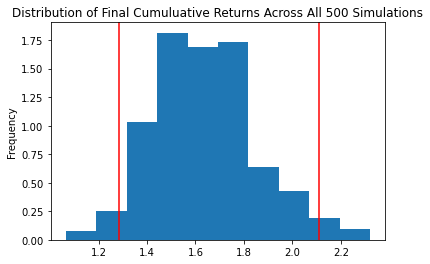

In [50]:
# Plot probability distribution and confidence intervals
dist_plot = mc_5year.plot_distribution()

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
summary5 = mc_5year.summarize_cumulative_return()

# Print summary statistics
print(summary5)

count           500.000000
mean              1.636772
std               0.213965
min               1.064789
25%               1.478599
50%               1.624334
75%               1.772194
max               2.321369
95% CI Lower      1.284792
95% CI Upper      2.108832
Name: 1260, dtype: float64


In [54]:
# Set initial investment
initial_investment = 20000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5 = round(summary5[8]*20000,2)
ci_upper_5 = round(summary5[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5} and ${ci_upper_5}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $25695.85 and $42176.63


### Ten Years Retirement Option

In [55]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10year = MCSimulation(
    portfolio_data = mc_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [56]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995295,0.998592,1.000032,0.996877,1.002410,1.003513,1.003265,0.995034,1.001212,0.994350,...,1.005650,1.006695,0.999503,0.998174,0.993978,0.991657,0.997474,0.997209,1.003043,0.999046
2,0.994076,1.001353,0.994948,0.998032,0.997853,1.004207,1.004810,0.998403,1.000868,0.992944,...,1.011610,1.002794,1.005303,1.001416,0.990171,0.990813,0.997758,0.996785,1.001625,0.990722
3,0.995293,1.000038,0.998274,1.000361,1.001646,1.005983,1.011009,1.001918,0.997403,0.994725,...,1.005260,1.009042,1.012156,1.001252,0.989156,0.993288,0.998944,0.996098,1.001220,1.000799
4,0.995485,1.004223,0.999451,0.997194,0.997427,1.009235,1.015527,1.000058,0.996315,0.999528,...,1.003669,1.002176,1.012174,1.001407,0.988669,0.992167,0.994579,0.994930,1.003684,1.004326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.765228,1.765356,1.294461,1.725727,1.740052,1.673884,1.424795,1.657046,1.479028,1.438630,...,1.400211,1.600147,1.372827,1.899395,1.523438,1.282840,1.837674,1.425634,1.707441,1.958648
1257,1.763389,1.754380,1.285218,1.723790,1.735088,1.678071,1.420905,1.659933,1.482650,1.437332,...,1.397863,1.597453,1.371262,1.892618,1.523990,1.283566,1.827624,1.424853,1.702577,1.952092
1258,1.765506,1.747015,1.284616,1.724243,1.739432,1.668531,1.428380,1.669458,1.475830,1.430775,...,1.397975,1.592257,1.371746,1.892623,1.530452,1.277999,1.827827,1.428072,1.709442,1.949091
1259,1.768293,1.744109,1.276928,1.721695,1.740953,1.666098,1.433258,1.676805,1.468683,1.427187,...,1.394355,1.586236,1.372376,1.893244,1.542710,1.272141,1.826773,1.422854,1.713877,1.951947


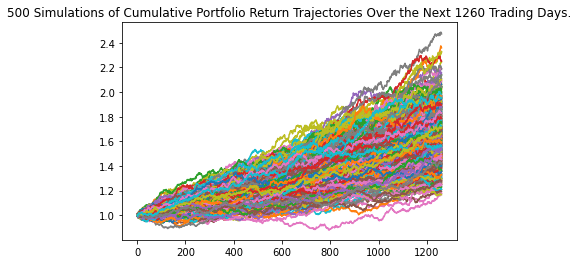

In [57]:
# Plot simulation outcomes
line_plot = mc_10year.plot_simulation()

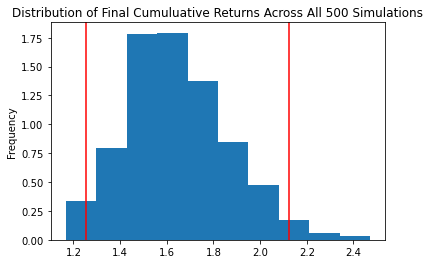

In [58]:
# Plot probability distribution and confidence intervals
dist_plot = mc_10year.plot_distribution()

In [60]:
# Fetch summary statistics from the Monte Carlo simulation results
summary10 = mc_10year.summarize_cumulative_return()

# Print summary statistics
print(summary10)

count           500.000000
mean              1.646331
std               0.220897
min               1.167084
25%               1.490974
50%               1.630061
75%               1.781392
max               2.471731
95% CI Lower      1.251999
95% CI Upper      2.122876
Name: 1260, dtype: float64


In [61]:
# Set initial investment
initial_investment = 20000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary10[8]*20000,2)
ci_upper_ten = round(summary10[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $25039.98 and $42457.52
